In [117]:
# import requests
# import pandas as pd

# url = "https://earthquake.usgs.gov/fdsnws/event/1/query"

# params = {
#     "format": "geojson",
#     "starttime": "2013-01-01",
#     "endtime": "2024-10-28",
#     "minmagnitude": 0,
#     "maxmagnitude": 10,
#     "minlatitude": 24.0,
#     "maxlatitude": 45.5,
#     "minlongitude": 122.0,
#     "maxlongitude": 153.0
# }


# response = requests.get(url, params=params)

# if response.status_code == 200:

#     data = response.json()

#     earthquake = pd.json_normalize(data['features'])


#     earthquake = earthquake[['properties.time', 'properties.place', 'properties.mag', 'geometry.coordinates']]
#     earthquake['properties.time'] = pd.to_datetime(earthquake['properties.time'], unit='ms')


#     # earthquake.to_csv("earthquake.csv", index=False)

# else:
#     print("요청 실패, 상태 코드:", response.status_code)
#     print("오류 메시지:", response.text)


In [118]:
earthquake_data = earthquake.copy()

In [119]:
len(earthquake_data)

13675

In [120]:
earthquake_data.columns = ['date', 'location', 'magnitude', 'coordinates']
# earthquake_data = earthquake_data.set_index('date')

In [121]:
earthquake_data = earthquake_data.loc[earthquake_data['location'] == 'Izu Islands, Japan region', ['date','magnitude', 'location']]

In [122]:
earthquake_data['date'] = earthquake_data['date'].astype(str)
earthquake_data['date'] = earthquake_data['date'].apply(lambda x: x[:11])

In [123]:
earthquake_data['date'] = pd.to_datetime(earthquake_data['date'])
earthquake_data['date'] = earthquake_data['date'].dt.floor('D')

In [124]:
earthquake_data = earthquake_data.groupby('date')['magnitude'].mean().reset_index()
earthquake_data = earthquake_data.set_index('date')

In [125]:
full_range = pd.date_range(start=earthquake_data.index.min(),
                           end=earthquake_data.index.max(), freq='D')

# 전체 날짜 범위를 인덱스로 하는 새로운 데이터프레임 생성
full_data = pd.DataFrame(index=full_range)

# 기존 데이터와 병합하여 빠진 날짜는 NaN으로 채워짐
earthquake_data = full_data.join(earthquake_data)

In [126]:
earthquake_data['magnitude'] = earthquake_data['magnitude'].fillna(0)
# earthquake_data['magnitude'] = earthquake_data['magnitude'].interpolate(method='linear')

In [127]:
earthquake_data = earthquake_data.reset_index()
earthquake_data.rename(columns={'index': 'date'}, inplace=True)

# 해수면 온도데이터 전처리

In [128]:
sst_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/프로젝트2/processed_data.csv")

In [129]:
sst_df

,DATE,LATITUDE,LONGITUDE,SEA_LVL_PRES,SST_MM,SEA_SURF_TEMP,WAVE_PERIOD,WAVE_HGT
0,2013-01-01,37.54,130.0,10158.333333,9.0,123.333333,5.666667,3.000000
1,2013-01-02,37.54,130.0,10276.000000,9.0,129.000000,7.833333,5.666667
2,2013-01-03,37.54,130.0,10302.428571,9.0,125.375000,7.250000,4.375000
3,2013-01-04,37.54,130.0,10260.333333,9.0,123.000000,7.571429,2.428571
4,2013-01-05,37.54,130.0,10206.142857,9.0,120.625000,6.875000,2.750000
...,...,...,...,...,...,...,...,...
4012,2023-12-27,37.54,130.0,10020.458333,9.0,154.833333,5.190476,1.476190
4013,2023-12-28,37.54,130.0,10020.458333,9.0,152.000000,4.500000,1.625000
4014,2023-12-29,37.54,130.0,10020.458333,9.0,152.041667,4.304348,1.304348
4015,2023-12-30,37.54,130.0,10020.458333,9.0,141.000000,3.875000,1.000000


In [130]:
sst_df = sst_df.drop(['LATITUDE', 'LONGITUDE', 'SST_MM'], axis=1)

In [131]:
sst_df['date'] = pd.to_datetime(sst_df['DATE'], format='%Y-%m-%d')

In [132]:
sst_df = sst_df.set_index('date')

In [133]:
merged_df = pd.merge(earthquake_data, sst_df, on='date', how='outer')

In [134]:
merged_df

,date,magnitude,DATE,SEA_LVL_PRES,SEA_SURF_TEMP,WAVE_PERIOD,WAVE_HGT
0,2013-01-01,NaN,2013-01-01,10158.333333,123.333333,5.666667,3.000000
1,2013-01-02,4.6,2013-01-02,10276.000000,129.000000,7.833333,5.666667
2,2013-01-03,0.0,2013-01-03,10302.428571,125.375000,7.250000,4.375000
3,2013-01-04,0.0,2013-01-04,10260.333333,123.000000,7.571429,2.428571
4,2013-01-05,0.0,2013-01-05,10206.142857,120.625000,6.875000,2.750000
...,...,...,...,...,...,...,...
4311,2024-10-21,0.0,NaN,NaN,NaN,NaN,NaN
4312,2024-10-22,0.0,NaN,NaN,NaN,NaN,NaN
4313,2024-10-23,4.7,NaN,NaN,NaN,NaN,NaN
4314,2024-10-24,0.0,NaN,NaN,NaN,NaN,NaN


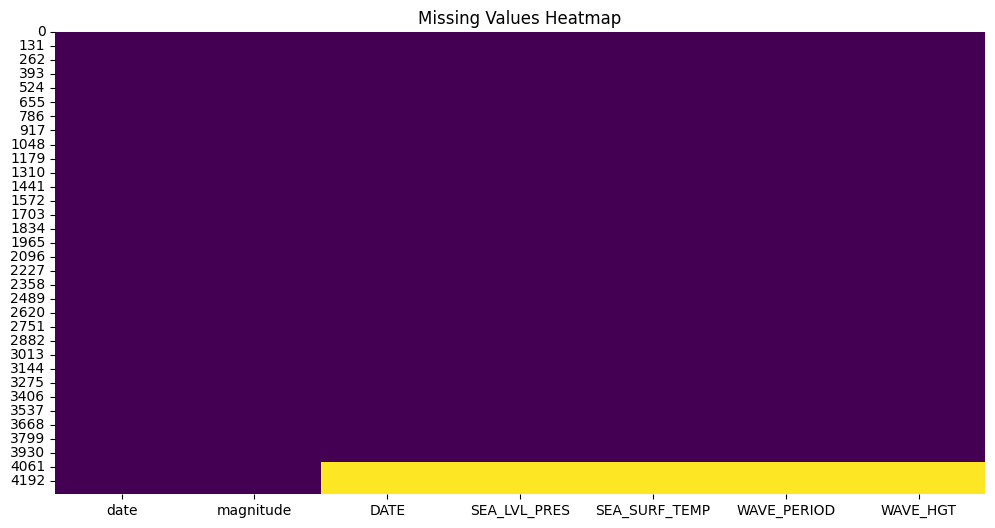

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# NaN 값 확인을 위한 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(merged_df.isna(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [136]:
merged_df = merged_df.dropna(axis=0)

In [137]:
# import sklearn.preprocessing

# scaler = sklearn.preprocessing.MinMaxScaler()
# scaled_data = scaler.fit_transform(merged_df[['magnitude', 'SEA_LVL_PRES', 'SEA_SURF_TEMP',	'WAVE_PERIOD', 'WAVE_HGT']])

In [138]:
def load_data(data, seq_len):
    X = []
    y = []

    for i in range(seq_len, len(data)):
        X.append(data.iloc[i - seq_len:i, ])
        y.append(data.iloc[i, 0])
    return X, y

In [139]:
merged_df.columns

Index(['date', 'magnitude', 'DATE', 'SEA_LVL_PRES', 'SEA_SURF_TEMP',
       'WAVE_PERIOD', 'WAVE_HGT'],
      dtype='object')

In [140]:
merged_df_X = merged_df[['magnitude', 'SEA_SURF_TEMP', 'WAVE_PERIOD', 'WAVE_HGT']]

seq_len = 30
X, y = load_data(merged_df_X, seq_len)

In [141]:
X_train.shape

(3212, 30, 7)

In [142]:
num = int(len(merged_df_X) * 0.8)
num

3212

In [143]:
X_train = X[:num]
y_train = y[:num]
X_test = X[num:]
y_test = y[num:]

import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# X_train = np.reshape(X_train, (len(X_train), seq_len, 5))
# X_test = np.reshape(X_test, (len(X_test), seq_len, 5))

In [144]:
print('x_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (3212, 30, 4)
y_train.shape =  (3212,)
x_test.shape =  (774, 30, 4)
y_test.shape =  (774,)


In [145]:
import tensorflow as tf
from keras.layers import Dense, Dropout, SimpleRNN, LSTM, Bidirectional
from keras.models import Sequential

model_lstm = Sequential()

model_lstm.add(LSTM(128, activation='tanh', input_shape=(X_train.shape[1], 4), return_sequences=True))
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(64, activation='tanh', return_sequences=True))
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(24, activation='tanh'))
model_lstm.add(Dropout(0.2))

model_lstm.add(Dense(10, activation='relu'))
model_lstm.add(Dense(1))

model_lstm.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                       │ (None, 30, 128)             │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 30, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 24)                  │           8,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,309 (493.39 KB)

 Trainable params: 126,309 (493.39 KB)

 Non-trainable params: 0 (0.00 B)

In [146]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 모델 컴파일
model_lstm.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

# 조기 종료 콜백 설정
# early_stopping = EarlyStopping(
#     monitor='val_loss',
#     patience=5,
#     restore_best_weights=True
# )

# 모델 훈련
history = model_lstm.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,  # 훈련 데이터의 20%를 검증용으로 사용
    # callbacks=[early_stopping],
    verbose=1
)



Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 14s 85ms/step - loss: 3.6487 - mean_absolute_error: 1.4807 - val_loss: 3.5137 - val_mean_absolute_error: 1.5491
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - loss: 3.6667 - mean_absolute_error: 1.5662 - val_loss: 3.5153 - val_mean_absolute_error: 1.5439
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - loss: 3.6883 - mean_absolute_error: 1.5607 - val_loss: 3.5347 - val_mean_absolute_error: 1.4865
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 3.4948 - mean_absolute_error: 1.5209 - val_loss: 3.5317 - val_mean_absolute_error: 1.4927
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - loss: 3.4101 - mean_absolute_error: 1.4688 - val_loss: 3.5239 - val_mean_absolute_error: 1.5080
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 3.5741 - mean_absolute_error: 1.5468 - val_loss: 3.5130 - val_mean_absolute_error: 1.5588
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - loss: 3.4536 - mean_absolute_error: 1.5104 - va

In [147]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lstmPredict = model_lstm.predict(X_test)
lstmScore = r2_score(y_test, lstmPredict)
print("R2 Score : ", lstmScore)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, lstmPredict)
print("MAE: ", mae)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, lstmPredict)
print("MSE: ", mse)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
R2 Score :  -0.07011195065946163
MAE:  1.78130959269948
MSE:  4.717120302207205


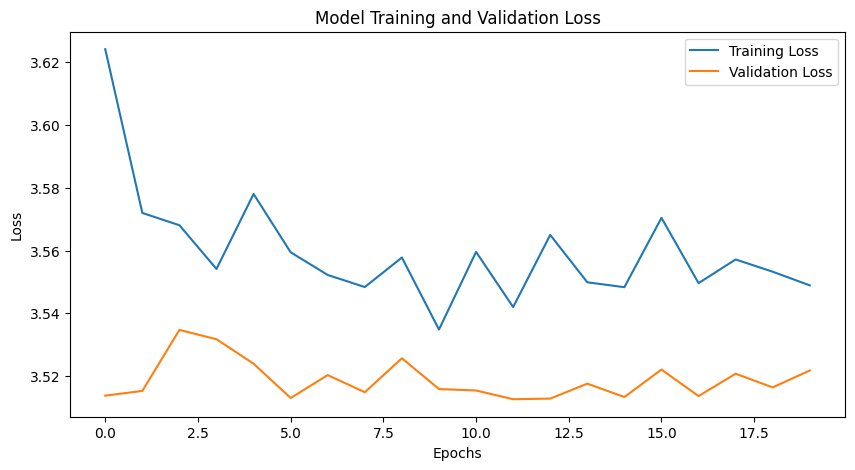

In [148]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# 훈련 손실 및 검증 손실 그래프
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
